In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
movies = pd.read_csv("my_movies.csv")
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [5]:
mov_1 = movies.iloc[:,0:5]

In [6]:
df1 = pd.get_dummies(mov_1)
df1.head()

,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1
1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [8]:
mov_2 = movies.iloc[:,5:15]
mov_2

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [9]:
movies_new=mov_2.melt(var_name='Movies',value_name='Values')
movies_new

,Movies,Values
0,Sixth Sense,1
1,Sixth Sense,0
2,Sixth Sense,0
3,Sixth Sense,1
4,Sixth Sense,1
...,...,...
95,Green Mile,0
96,Green Mile,0
97,Green Mile,0
98,Green Mile,0


In [10]:
movies=pd.crosstab(index=movies_new['Values'],columns=movies_new['Movies'])
movies

Movies,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense
Values,,,,,,,,,,
0,9,3,8,8,9,9,8,8,4,4
1,1,7,2,2,1,1,2,2,6,6


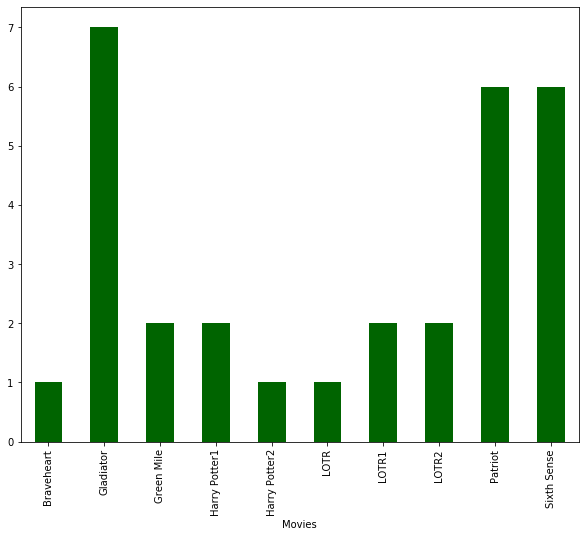

In [13]:
plt.figure(figsize=(10,8))
movies.iloc[1,:].plot(kind='bar', color = 'darkgreen')

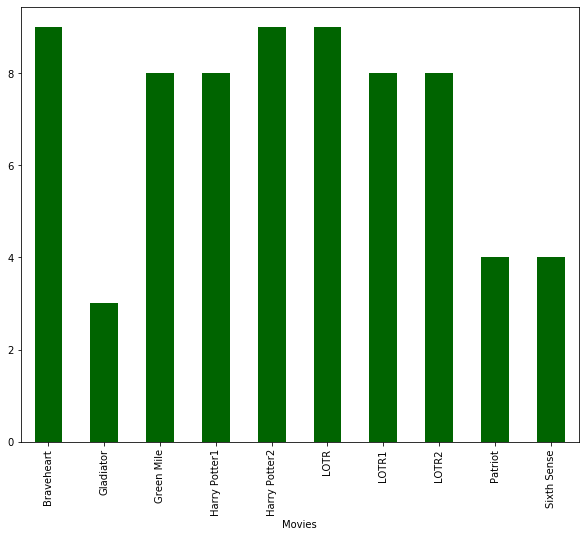

In [14]:
plt.figure(figsize=(10,8))
movies.iloc[0,:].plot(kind='bar', color = 'darkgreen')

In [15]:
#counting how many movies are watched

movies.index = ['Not_Watched', 'Watched']
movies

Movies,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense
Not_Watched,9,3,8,8,9,9,8,8,4,4
Watched,1,7,2,2,1,1,2,2,6,6


In [16]:
print("Maximum Watched movie:" ,movies.idxmax(axis=1)[1],':',movies.loc['Watched'].max())
print("Least Watched movie:" ,movies.idxmax(axis=1)[0],':',movies.loc['Not_Watched'].max())

Maximum Watched movie: Gladiator : 7
Least Watched movie: Braveheart : 9


In [17]:
sorted_df = pd.DataFrame(movies.sort_values(by = ['Watched'], axis=1, ascending=False).transpose())
sorted_df

,Not_Watched,Watched
Movies,,
Gladiator,3,7
Patriot,4,6
Sixth Sense,4,6
Green Mile,8,2
Harry Potter1,8,2
LOTR1,8,2
LOTR2,8,2
Braveheart,9,1
Harry Potter2,9,1


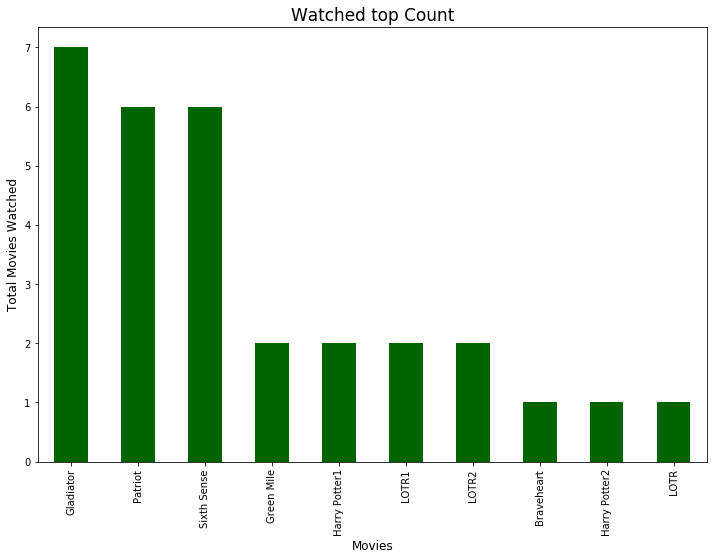

In [24]:
fig = plt.subplots(figsize=(12,8))

Watched = sorted_df.head(50).xs('Watched' , axis=1)

Watched.plot(kind='bar', fontsize=10, color = 'darkgreen')

plt.title('Watched top Count',fontsize=17)
plt.xlabel('Movies', fontsize=12)
plt.ylabel('Total Movies Watched', fontsize=12)
plt.show()

# Apriori Algorithm

In [25]:
from mlxtend.frequent_patterns import apriori, association_rules

freq_items1 = apriori(mov_2, min_support=0.10, max_len = 4, use_colnames=True)
freq_items1.sort_values('support', ascending = False, inplace = True)

freq_items1.tail()

,support,itemsets
24,0.1,"(LOTR2, Harry Potter1)"
25,0.1,"(Harry Potter1, Harry Potter2)"
27,0.1,"(Patriot, Braveheart)"
28,0.1,"(LOTR2, Green Mile)"
51,0.1,"(LOTR1, Harry Potter1, LOTR2, Green Mile)"


In [27]:
#generating rules
rules1 = association_rules(freq_items1, metric="lift", min_threshold=1)
rules1.sort_values('lift',ascending = False, inplace=True) #sorted with lift > 1

rules1.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
6,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
119,(Green Mile),"(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.0
116,"(Sixth Sense, Gladiator)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0


# Removing Redundancy

In [28]:
redundancy = rules1.sort_values(by=['leverage','confidence'], axis=0, ascending=False).reset_index()
redundancy = redundancy.drop(['index'], axis=1)
redundancy.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
3,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


# Finding Unique Sets

In [29]:
unique_rules = redundancy.iloc[::1]
unique_rules.shape

(208, 9)

In [30]:
unique_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
3,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


# Generated Rules analysis

In [31]:
#Rules sorted with respect to lift

top_sort = unique_rules[unique_rules['lift']>1.5]

In [32]:
top_sored = top_sort.sort_values(by='lift', ascending = False)
top_sort.reset_index(inplace=True)
top_sort = top_sort.drop(['index'],axis=1)
top_sort.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf
1,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
2,"(Sixth Sense, Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
3,"(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
4,"(LOTR1, Green Mile)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [33]:
x = top_sort[['antecedents','consequents']]

In [34]:
# top sorted Antecedents

item_list = [] 
for i in x.antecedents.to_list(): 
    for j in list(set(i)):
        item_list.append(j)  

In [35]:
# top sorted consequents

item_list = []
for p in x.consequents.to_list():
    for q in list(set(p)):
        item_list.append(q)

In [36]:
#generating unique list of items (# without redundacy)

def unique(list1): 
    # insert the list to the set 
    list_set = set(list1) 
    
    # convert the set to the list 
    unique_list = (list(list_set))
    
    top_items =[]
    for m in unique_list:
        top_items.append(m)  
        
    print(top_items)

In [37]:
### Concluding top_items and the shuffled combination of top lift result

unique(item_list)

['Gladiator', 'Braveheart', 'LOTR', 'Harry Potter1', 'Patriot', 'Sixth Sense', 'LOTR2', 'LOTR1', 'Harry Potter2', 'Green Mile']


### Trying different values of Min_support, Metric, Max_len, and Min_thershold.

In [38]:
frequent_movies_s = apriori(mov_2, min_support = 0.005, max_len = 3, use_colnames = True)

In [39]:
#sorting with respect to support
frequent_movies_s.sort_values("support", ascending = False, inplace = True)

In [40]:
#generating association rules
rules = association_rules(frequent_movies_s, metric = "lift", min_threshold= 1)

In [41]:
#sorting rules with respect to lift
rules.sort_values('lift', ascending = False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
80,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
85,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
62,"(LOTR2, Harry Potter1)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
72,(Green Mile),(LOTR),0.2,0.1,0.1,0.5,5.0,0.08,1.8
71,(Green Mile),"(Sixth Sense, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
66,"(Sixth Sense, LOTR2)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
65,(LOTR2),"(LOTR1, Harry Potter1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
63,(LOTR1),"(LOTR2, Harry Potter1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
60,"(LOTR1, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
59,(Green Mile),"(Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8


In [42]:
# Min_support = 0.1, Max_len = 5, Lift, Min_threshold=10

frequent_movies_2 = apriori(mov_2, min_support = 0.1, max_len = 5, use_colnames = True)
rules2 = association_rules(frequent_movies_2, metric = "lift", min_threshold= 10)

In [43]:
## Min_support = 0.2, Max_len = 4, Lift, Min_threshold=75%

frequent_movies_3 = apriori(mov_2, min_support = 0.2, max_len = 4, use_colnames = True)
rules2 = association_rules(frequent_movies_3, metric = "lift", min_threshold=0.75)

In [44]:
## Min_support = 0.1, Max_len = 3, Lift, Min_threshold=1

frequent_movies_4 = apriori(mov_2, min_support = 0.1, max_len = 3, use_colnames = True)
rules2 = association_rules(frequent_movies_4, metric = "lift", min_threshold= 1)

In [45]:
## Min_support = 0.2, Max_len = 3, Confidence, Min_threshold = 1.5

frequent_movies_5 = apriori(mov_2, min_support = 0.2, max_len = 3, use_colnames = True)
rules2 = association_rules(frequent_movies_5, metric = "confidence", min_threshold= 1.5)

In [46]:
## Min_support = 0.2, Max_len = 3, Confidence, Min_threshold = 1

frequent_movies_6 = apriori(mov_2, min_support = 0.2, max_len = 3, use_colnames = True)
rules2 = association_rules(frequent_movies_6, metric = "confidence", min_threshold= 1)

# Bar Plots

Text(0, 0.5, 'Support')

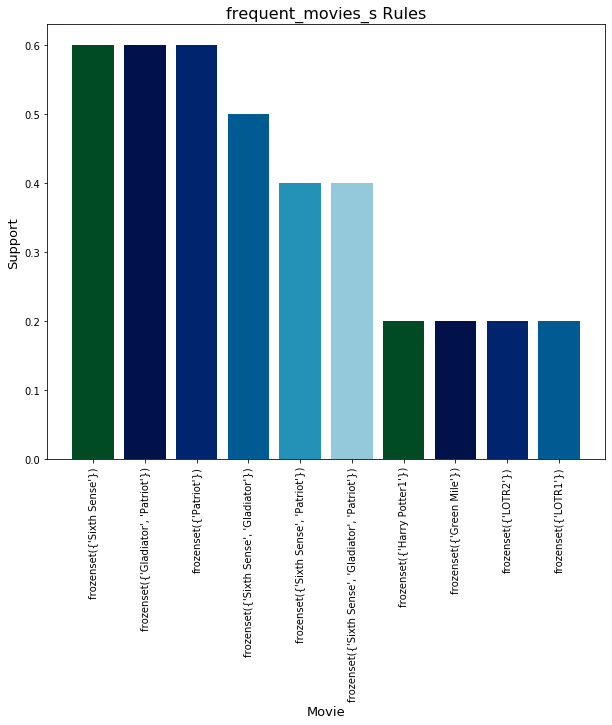

In [58]:
#frequent_movies_s

plt.figure(figsize = (10,8))
plt.bar(x=list(range(1,11)),height=frequent_movies_s.support[1:11], color = sns.color_palette ('ocean'))
plt.xticks(list(range(1,11)),frequent_movies_s.itemsets[1:11],rotation ='vertical')
plt.title('frequent_movies_s Rules', fontsize = 16)
plt.xlabel('Movie', fontsize = 13)
plt.ylabel('Support', fontsize = 13)

Text(0, 0.5, 'Support')

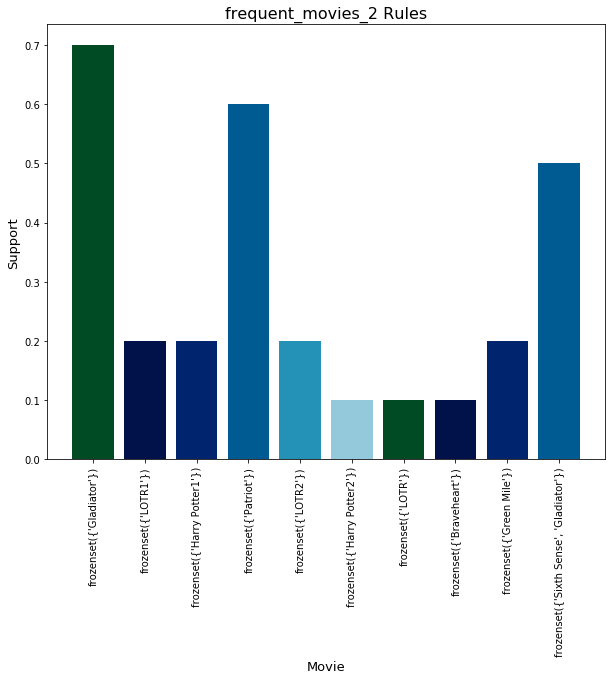

In [61]:
#frequent_movies_2

plt.figure(figsize = (10,8))
plt.bar(x=list(range(1,11)),height=frequent_movies_2.support[1:11], color = sns.color_palette ('ocean'))
plt.xticks(list(range(1,11)),frequent_movies_2.itemsets[1:11],rotation ='vertical')
plt.title('frequent_movies_2 Rules', fontsize = 16)
plt.xlabel('Movie', fontsize = 13)
plt.ylabel('Support', fontsize = 13)

Text(0, 0.5, 'Support')

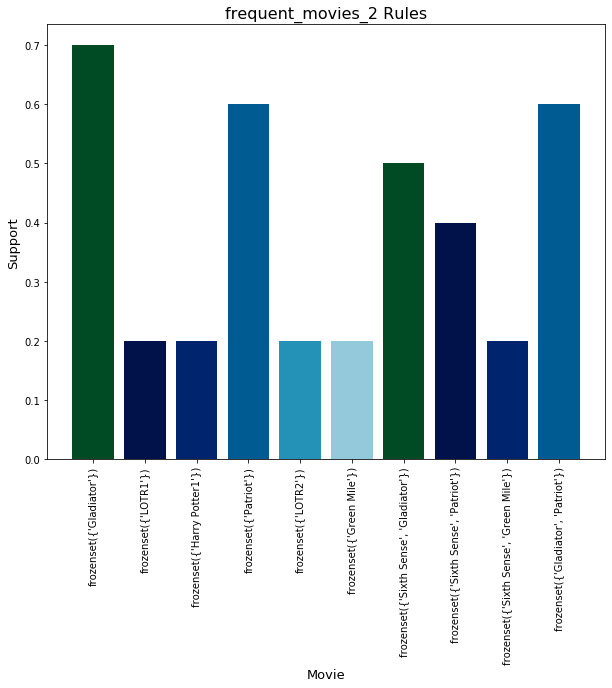

In [63]:
#frequent_movies_3

plt.figure(figsize = (10,8))
plt.bar(x=list(range(1,11)),height=frequent_movies_3.support[1:11], color = sns.color_palette ('ocean'))
plt.xticks(list(range(1,11)),frequent_movies_3.itemsets[1:11],rotation ='vertical')
plt.title('frequent_movies_2 Rules', fontsize = 16)
plt.xlabel('Movie', fontsize = 13)
plt.ylabel('Support', fontsize = 13)

Text(0, 0.5, 'Support')

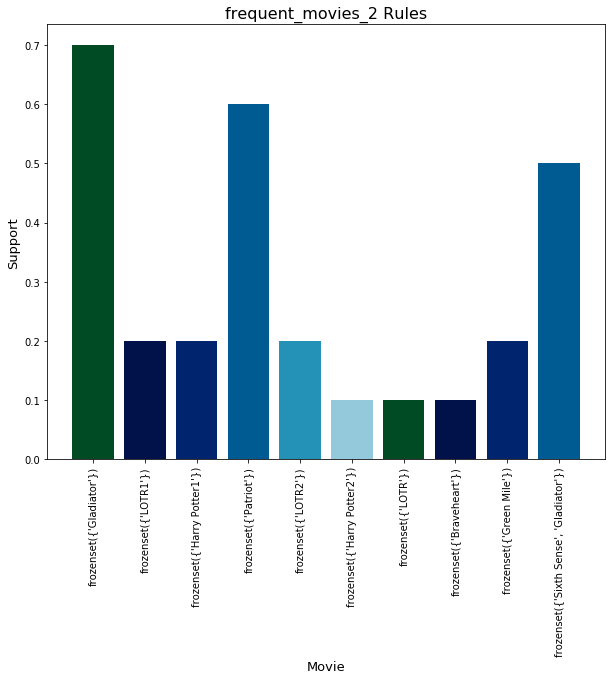

In [64]:
#frequent_movies_4

plt.figure(figsize = (10,8))
plt.bar(x=list(range(1,11)),height=frequent_movies_4.support[1:11], color = sns.color_palette ('ocean'))
plt.xticks(list(range(1,11)),frequent_movies_4.itemsets[1:11],rotation ='vertical')
plt.title('frequent_movies_2 Rules', fontsize = 16)
plt.xlabel('Movie', fontsize = 13)
plt.ylabel('Support', fontsize = 13)

Text(0, 0.5, 'Support')

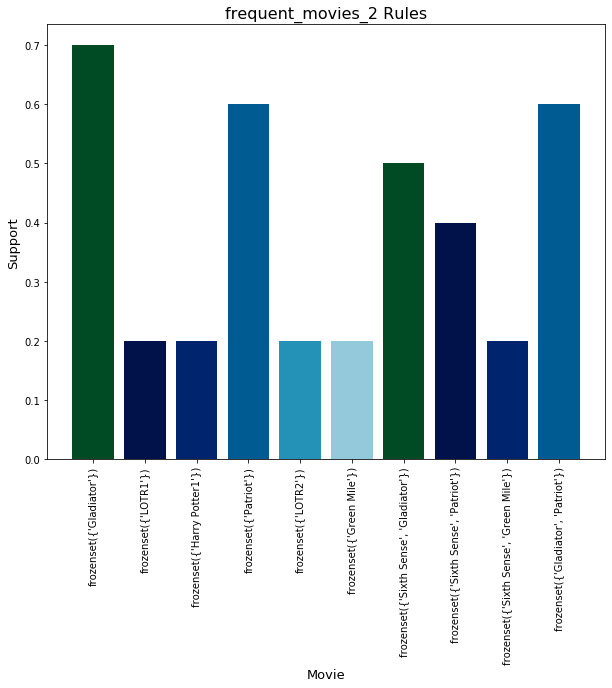

In [65]:
#frequent_movies_5

plt.figure(figsize = (10,8))
plt.bar(x=list(range(1,11)),height=frequent_movies_5.support[1:11], color = sns.color_palette ('ocean'))
plt.xticks(list(range(1,11)),frequent_movies_5.itemsets[1:11],rotation ='vertical')
plt.title('frequent_movies_2 Rules', fontsize = 16)
plt.xlabel('Movie', fontsize = 13)
plt.ylabel('Support', fontsize = 13)

Text(0, 0.5, 'Support')

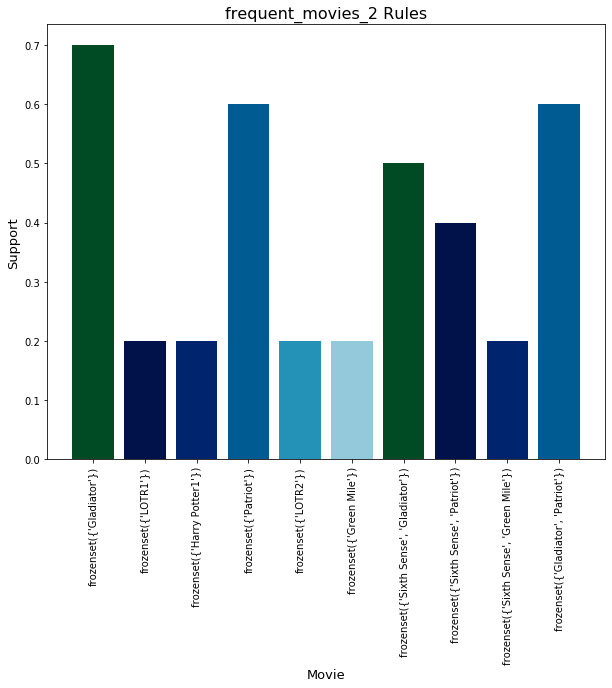

In [66]:
#frequent_movies_6

plt.figure(figsize = (10,8))
plt.bar(x=list(range(1,11)),height=frequent_movies_6.support[1:11], color = sns.color_palette ('ocean'))
plt.xticks(list(range(1,11)),frequent_movies_6.itemsets[1:11],rotation ='vertical')
plt.title('frequent_movies_2 Rules', fontsize = 16)
plt.xlabel('Movie', fontsize = 13)
plt.ylabel('Support', fontsize = 13)